<a href="https://colab.research.google.com/github/cmreyesvalencia-png/Assignment-AI-Projects/blob/main/A1_C13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1: Data Collection and Initial Analysis of Stock Market Datan**
- **Course:** Data Analytics and Business Intelligence Analyst
- **Institution:** Willis College
- **Student Name:** Carlos Reyes
- **Instructor:** Ratinder Rajpal
- **Date:** 2025 Nov, 21

# **Introduction**
This assignment provides experience using real-world financial data from the “Daily Historical Stock Prices (1970 - 2020)” dataset. The dataset includes the following columns: Date, Open, High, Low, Close, Volume, and Adjusted Close. The project focuses on essential data science skills, including data handling, cleaning, and basic exploratory analysis. The student will conduct a detailed exploratory data analysis (EDA) of stock market trends over several decades to understand how key financial indicators have evolved over time. This foundational knowledge is critical for progressing to more advanced topics in subsequent projects.

The final deliverable will be a cleaned and well-understood dataset, documented with initial findings and potential hypotheses for deeper analysis.

# Step1: Data Collection
1. Register and download the datasets ‘historical_stocks.csv’ and ‘historical_stock_prices.csv’ from the download at the bottom of this page.
2. Load the dataset into a Pandas DataFrame. Ensure you understand the format and types of each column in each dataset.Step1:

In [ ]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Loads the dataset, converting from CSV to Parquet for efficient storage.
# Using Parquet significantly reduces file size; for instance,
# "historical_stock_prices.csv" (2GB) becomes
# "historical_stock_prices.parquet" (413MB),
# resulting in an 80% reduction in size.


def load_or_convert_to_parquet():
    """
    Load dataset from Parquet files or convert CSV to Parquet if needed
    Returns stocks_df, prices_df
    """
    stocks_parquet = "historical_stocks.parquet"
    prices_parquet = "historical_stock_prices.parquet"

    stocks_csv = "historical_stocks.csv"
    prices_csv = "historical_stock_prices.csv"

    # Check if Parquet files exist
    if os.path.exists(stocks_parquet) and os.path.exists(prices_parquet):
        print("Loading data from existing Parquet files...")
        stocks_df = pd.read_parquet(stocks_parquet)
        prices_df = pd.read_parquet(prices_parquet)
    else:
        print("Parquet files not found. Converting CSV to Parquet...")

        # Load from CSV
        if os.path.exists(stocks_csv) and os.path.exists(prices_csv):
            stocks_df = pd.read_csv(stocks_csv)
            prices_df = pd.read_csv(prices_csv)

            # Convert to Parquet
            stocks_df.to_parquet(stocks_parquet, index=False)
            prices_df.to_parquet(prices_parquet, index=False)
            print("CSV files successfully converted to Parquet format")
        else:
            raise FileNotFoundError("Neither Parquet nor CSV files found. Please ensure historical_stocks.csv and historical_stock_prices.csv exist.")

    return stocks_df, prices_df

# Load the dataset using Parquet conversion function
print("=" * 50)
print("LOADING DATASET")
print("=" * 50)
stocks_df, prices_df = load_or_convert_to_parquet()

# Display basic info about the dataframes
print("\nHistorical Stock Prices DataFrame:")
print(prices_df.head())
print(f"Shape: {prices_df.shape}")
print(f"Columns: {prices_df.columns.tolist()}")
print(f"Data types:\n{prices_df.dtypes}")
print(f"Missing values:\n{prices_df.isnull().sum()}")

print("\n" + "="*50)
print("Historical Stocks DataFrame:")
print(stocks_df.head())
print(f"Shape: {stocks_df.shape}")
print(f"Columns: {stocks_df.columns.tolist()}")
print(f"Data types:\n{stocks_df.dtypes}")
print(f"Missing values:\n{stocks_df.isnull().sum()}")

# Additional data exploration
print("\n" + "="*50)
print("DATASET SUMMARY")
print("="*50)

print("\nStock Prices Date Range:")
print(f"Start: {prices_df['date'].min()}")
print(f"End: {prices_df['date'].max()}")

print(f"\nUnique Tickers in Prices: {prices_df['ticker'].nunique()}")
print(f"Unique Tickers in Stocks: {stocks_df['ticker'].nunique()}")

print(f"\nStocks DataFrame - Sector Distribution:")
if 'sector' in stocks_df.columns:
    print(stocks_df['sector'].value_counts())

print(f"\nStocks DataFrame - Industry Distribution:")
if 'industry' in stocks_df.columns:
    print(stocks_df['industry'].value_counts().head(10))  # Top 10 industries

LOADING DATASET
Loading data from existing Parquet files...

Historical Stock Prices DataFrame:
  ticker   open  close  adj_close    low   high   volume        date
0    AHH  11.50  11.58   8.493155  11.25  11.68  4633900  2013-05-08
1    AHH  11.66  11.55   8.471151  11.50  11.66   275800  2013-05-09
2    AHH  11.55  11.60   8.507822  11.50  11.60   277100  2013-05-10
3    AHH  11.63  11.65   8.544494  11.55  11.65   147400  2013-05-13
4    AHH  11.60  11.53   8.456484  11.50  11.60   184100  2013-05-14
Shape: (20973889, 8)
Columns: ['ticker', 'open', 'close', 'adj_close', 'low', 'high', 'volume', 'date']
Data types:
ticker        object
open         float64
close        float64
adj_close    float64
low          float64
high         float64
volume         int64
date          object
dtype: object
Missing values:
ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
dtype: int64

Historical Stocks DataFrame:
  ticker exch

# Step2: Data Cleaning
1. Identify and handle missing values in the datasets. Choose a strategy to deal with them (e.g., filling with the mean or median, interpolation, or removal).
2. Check for duplicate entries and remove them if any.
3. Convert the ’Date’ column to a datetime format if not already and set it as the index of your DataFrame.



In [ ]:
# 1.Identify and handle missing values in the datasets

print("\n" + "="*70)
print("1. Identify and handle missing values in the datasets")
print("="*70)

# Check for missing values "prices dataset"
print("\nMissing values in prices dataframe:")
print(prices_df.isnull().sum())

# Check for missing values "stock dataset"
print("\nMissing values in stock dataframe:")
print(stocks_df.isnull().sum())


1. Identify and handle missing values in the datasets

Missing values in prices dataframe:
ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
dtype: int64

Missing values in stock dataframe:
ticker         0
exchange       0
name           0
sector      1440
industry    1440
dtype: int64


In [ ]:
# Strategy to address missing values
prices_df = prices_df.ffill() # It fills missing values with the last valid (non-missing) values that appeared above it in the same column

# For stocks dataframe, fill sector and industry missing values with 'Unknown'
if 'sector' in stocks_df.columns:
    stocks_df['sector'] = stocks_df['sector'].fillna('Unknown')
if 'industry' in stocks_df.columns:
    stocks_df['industry'] = stocks_df['industry'].fillna('Unknown')

In [ ]:
# 2. Check for duplicate entries and remove them if any

print("\n" + "="*50)
print("2. Check for duplicate entries and remove them if any")
print("="*50)

print(f"\nDuplicate rows in prices: {prices_df.duplicated().sum()}")
print(f"Duplicate rows in stocks: {stocks_df.duplicated().sum()}")


2. Check for duplicate entries and remove them if any

Duplicate rows in prices: 0
Duplicate rows in stocks: 0


In [ ]:
# Remove duplicates
prices_df.drop_duplicates(inplace=True)
stocks_df.drop_duplicates(inplace=True)

In [ ]:
# Convert date and set index
prices_df['date'] = pd.to_datetime(prices_df['date'])
prices_df.set_index('date', inplace=True)

In [ ]:
# 3. Merge Prices + Company Info
merged = prices_df.merge(stocks_df, on='ticker', how='left')


#Restore index(merge remove index)
merged.index=prices_df.index

print("\nMerged Dataset preview:")
print(merged.head())
print(f"Merged dataset shape: {merged.shape}")


Merged Dataset preview:
           ticker   open  close  adj_close    low   high   volume exchange  \
date                                                                         
2013-05-08    AHH  11.50  11.58   8.493155  11.25  11.68  4633900     NYSE   
2013-05-09    AHH  11.66  11.55   8.471151  11.50  11.66   275800     NYSE   
2013-05-10    AHH  11.55  11.60   8.507822  11.50  11.60   277100     NYSE   
2013-05-13    AHH  11.63  11.65   8.544494  11.55  11.65   147400     NYSE   
2013-05-14    AHH  11.60  11.53   8.456484  11.50  11.60   184100     NYSE   

                                       name   sector     industry  
date                                                               
2013-05-08  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL ESTATE  
2013-05-09  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL ESTATE  
2013-05-10  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL ESTATE  
2013-05-13  ARMADA HOFFLER PROPERTIES, INC.  FINANCE  REAL ESTATE  
2013-05-14  ARMADA H

# Step3: Data Segmentation by Decade
1. Create a new column in the DataFrame for prices to represent the decade.
2. Segment the data into separate DataFrames for each decade for easier comparative analysis.



In [ ]:
#4. Create Year & Decade

merged['year  '] = merged.index.year
merged['decade'] = merged['year  '] // 10 * 10

print("\nDecade Count")
print(merged['decade'].value_counts().sort_index())


Decade Count
decade
1970     164499
1980    1470571
1990    3427832
2000    6572053
2010    9338934
Name: count, dtype: int64


In [ ]:
#5. Split into Decades

decades = {}
for d in merged['decade'].unique():
    decades[d] = merged[merged['decade'] == d]
    print(f"Rows in decade{d}: {len(decades[d])}")

Rows in decade2010: 9338934
Rows in decade2000: 6572053
Rows in decade1990: 3427832
Rows in decade1980: 1470571
Rows in decade1970: 164499


# Step4: Exploratory Data Analysis by Decade
1. Merge the stock_prices dataset with the stock dataset using the appropriate key to include sector information with the stock prices.
2. For each decade DataFrame, calculate summary statistics (mean, median, standard deviation) for the Open, High, Low, Close, and Volume columns.
3. Create visualizations for each decade:
   - Time series plots for average monthly Close prices.
   - Histograms for Volume to analyze the distribution and any shifts over the decades.
   - Box plots for the High and Low prices to examine the range and presence of outliers.



In [ ]:
# 6. Summary Statistic

summary = {d:decades[d][['open','high','low','close','volume']].describe() for d in decades}

print("\nSummary Statistics for 1990s:")
print(summary[1990])



Summary Statistics for 1990s:
               open          high           low         close        volume
count  3.427832e+06  3.427832e+06  3.427832e+06  3.427832e+06  3.427832e+06
mean   4.529146e+01  4.687190e+01  4.381498e+01  4.530349e+01  8.635272e+05
std    1.391110e+03  1.464630e+03  1.329335e+03  1.391577e+03  5.834012e+06
min    1.302083e-02  1.302083e-02  1.236875e-02  1.302083e-02  1.000000e+00
25%    5.222222e+00  5.312500e+00  5.125000e+00  5.222222e+00  1.210000e+04
50%    1.058383e+01  1.075000e+01  1.043750e+01  1.059375e+01  6.220000e+04
75%    1.887500e+01  1.908524e+01  1.862500e+01  1.887500e+01  3.379000e+05
max    2.625000e+05  3.093000e+05  2.343000e+05  2.625000e+05  1.047620e+09



EXPLORATORY DATA ANALYSIS BY DECADE

2. Calculating summary statistics for each decade...

DECADE: 1970s
Number of records: 164,499

Summary Statistics:
            open       high        low      close       volume
count  164499.00  164499.00  164499.00  164499.00    164499.00
mean       12.49      12.64      12.37      12.49    724893.64
std        46.98      47.48      46.51      46.99   1377365.79
min         0.02       0.02       0.01       0.02        50.00
25%         1.27       1.29       1.26       1.27     26400.00
50%         2.79       2.84       2.77       2.79    187200.00
75%         6.82       6.89       6.75       6.82    819200.00
max       452.50     455.00     450.00     452.50  75315200.00

Additional Stats for 1970s:
OPEN   - Mean: 12.49, Median: 2.79, Std: 46.98
HIGH   - Mean: 12.64, Median: 2.84, Std: 47.48
LOW    - Mean: 12.37, Median: 2.77, Std: 46.51
CLOSE  - Mean: 12.49, Median: 2.79, Std: 46.99
VOLUME - Mean: 0.72M, Median: 0.19M, Std: 1.38M

DECADE: 1980s

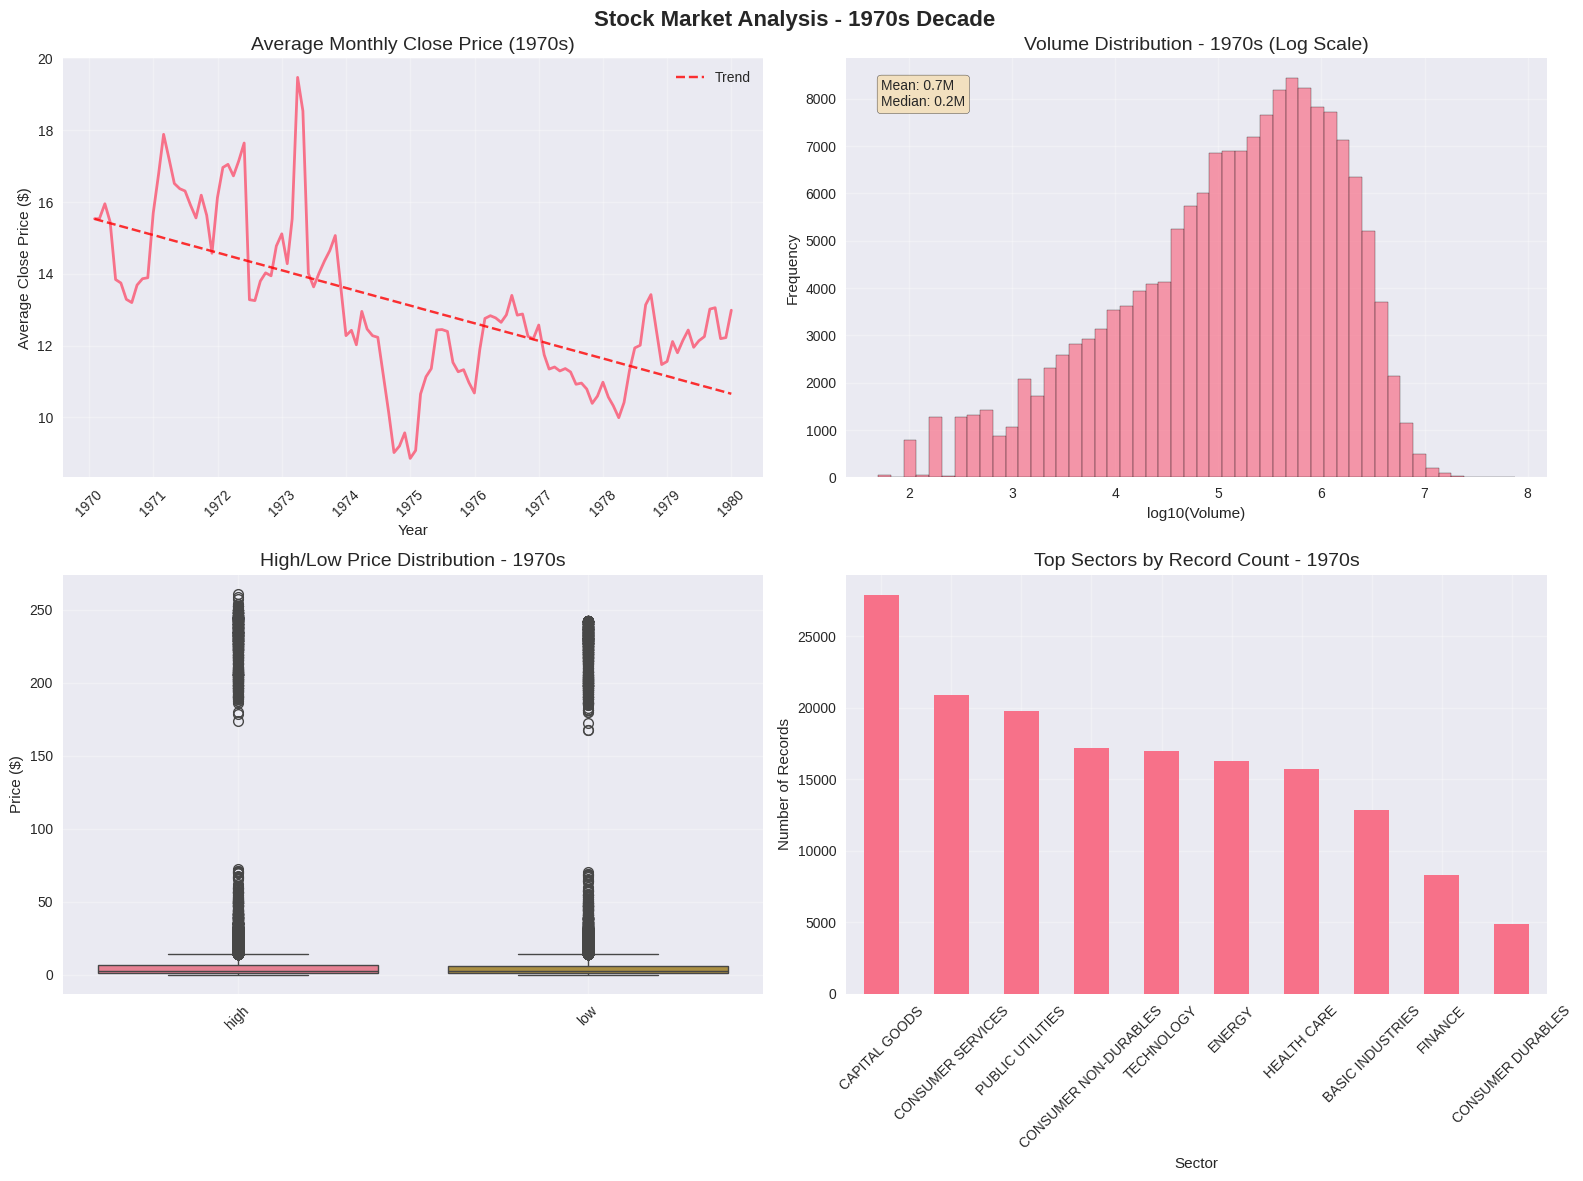

Saved visualization for 1970s as 'decade_analysis_1970s.png'

Creating visualizations for 1980s...


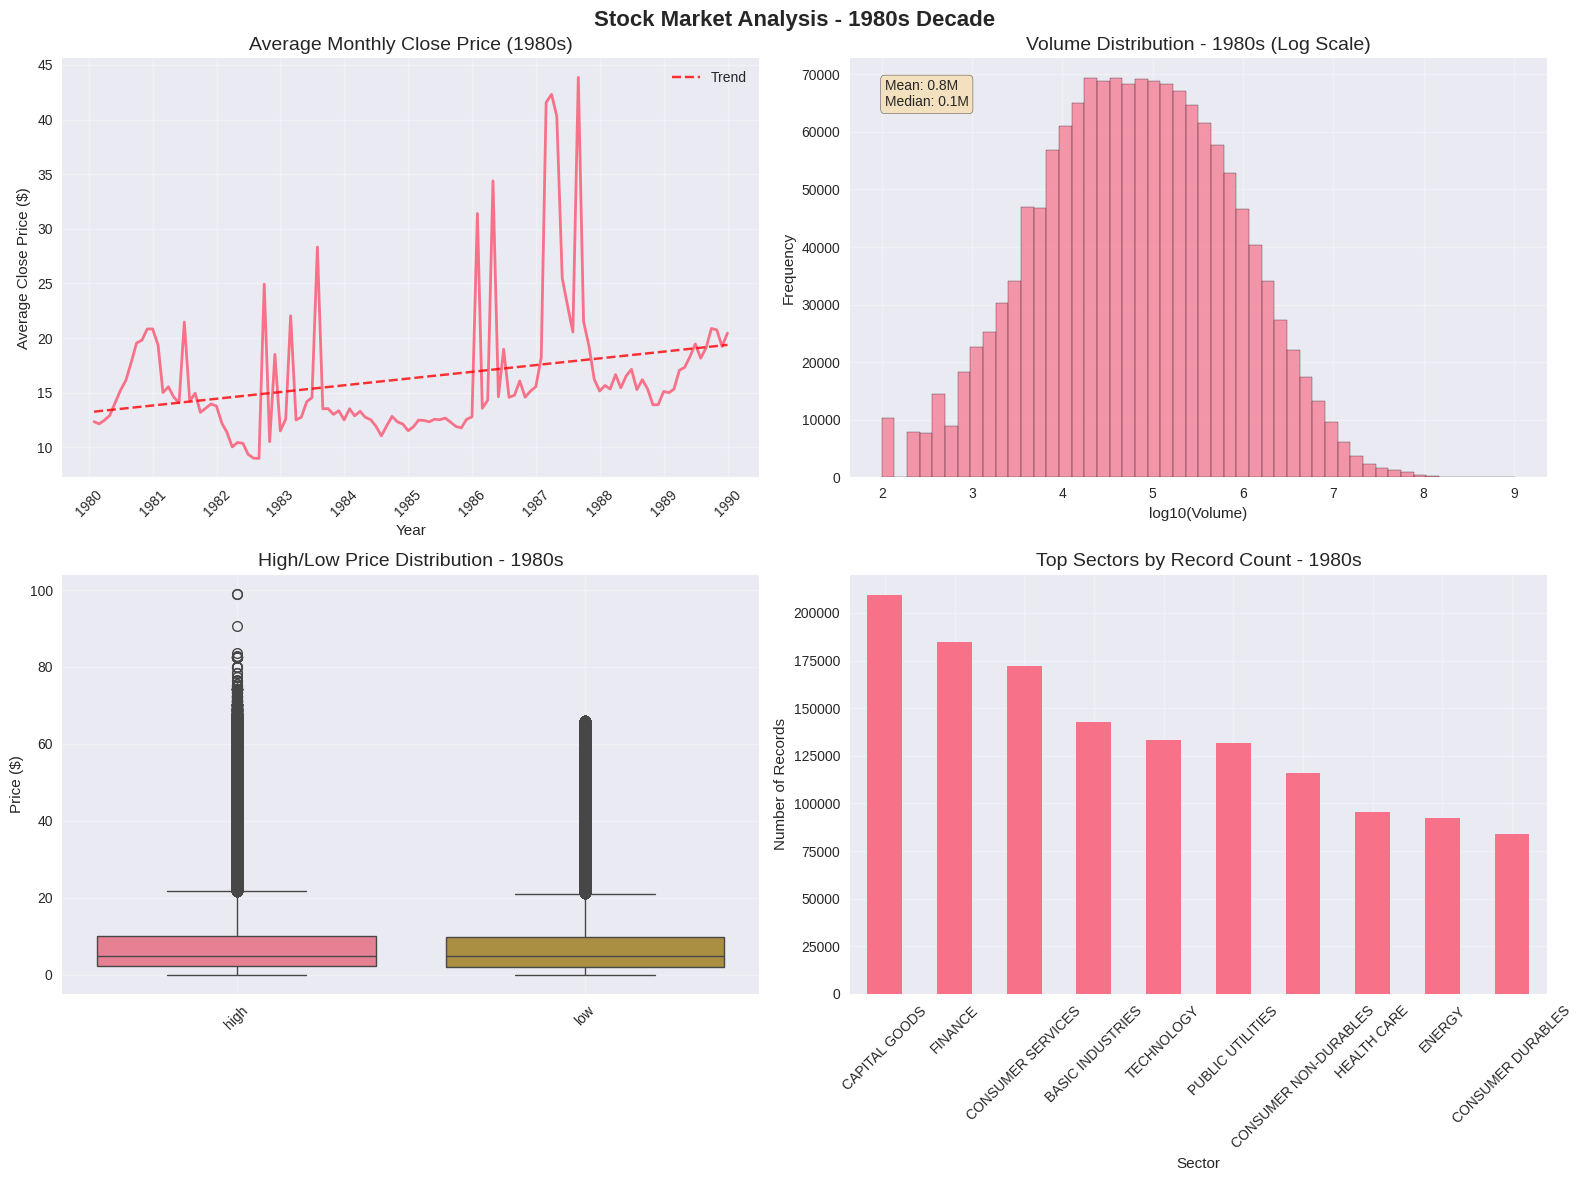

Saved visualization for 1980s as 'decade_analysis_1980s.png'

Creating visualizations for 1990s...


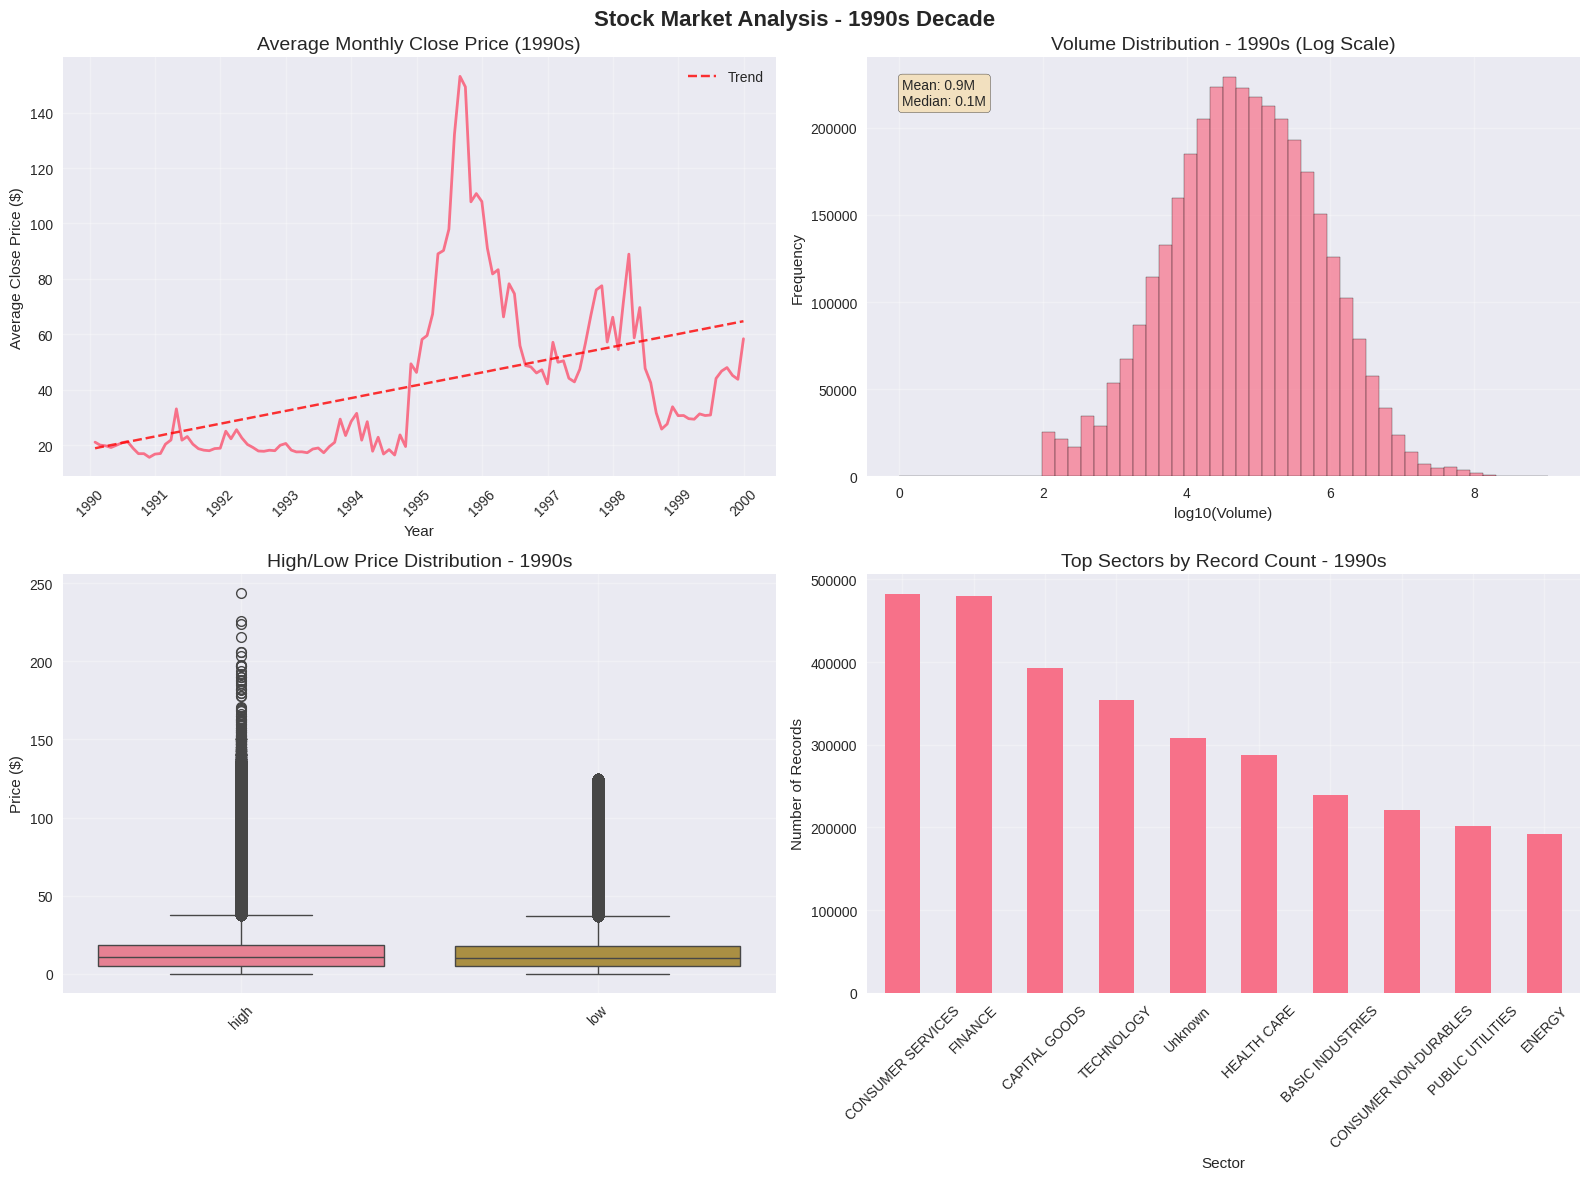

Saved visualization for 1990s as 'decade_analysis_1990s.png'

Creating visualizations for 2000s...


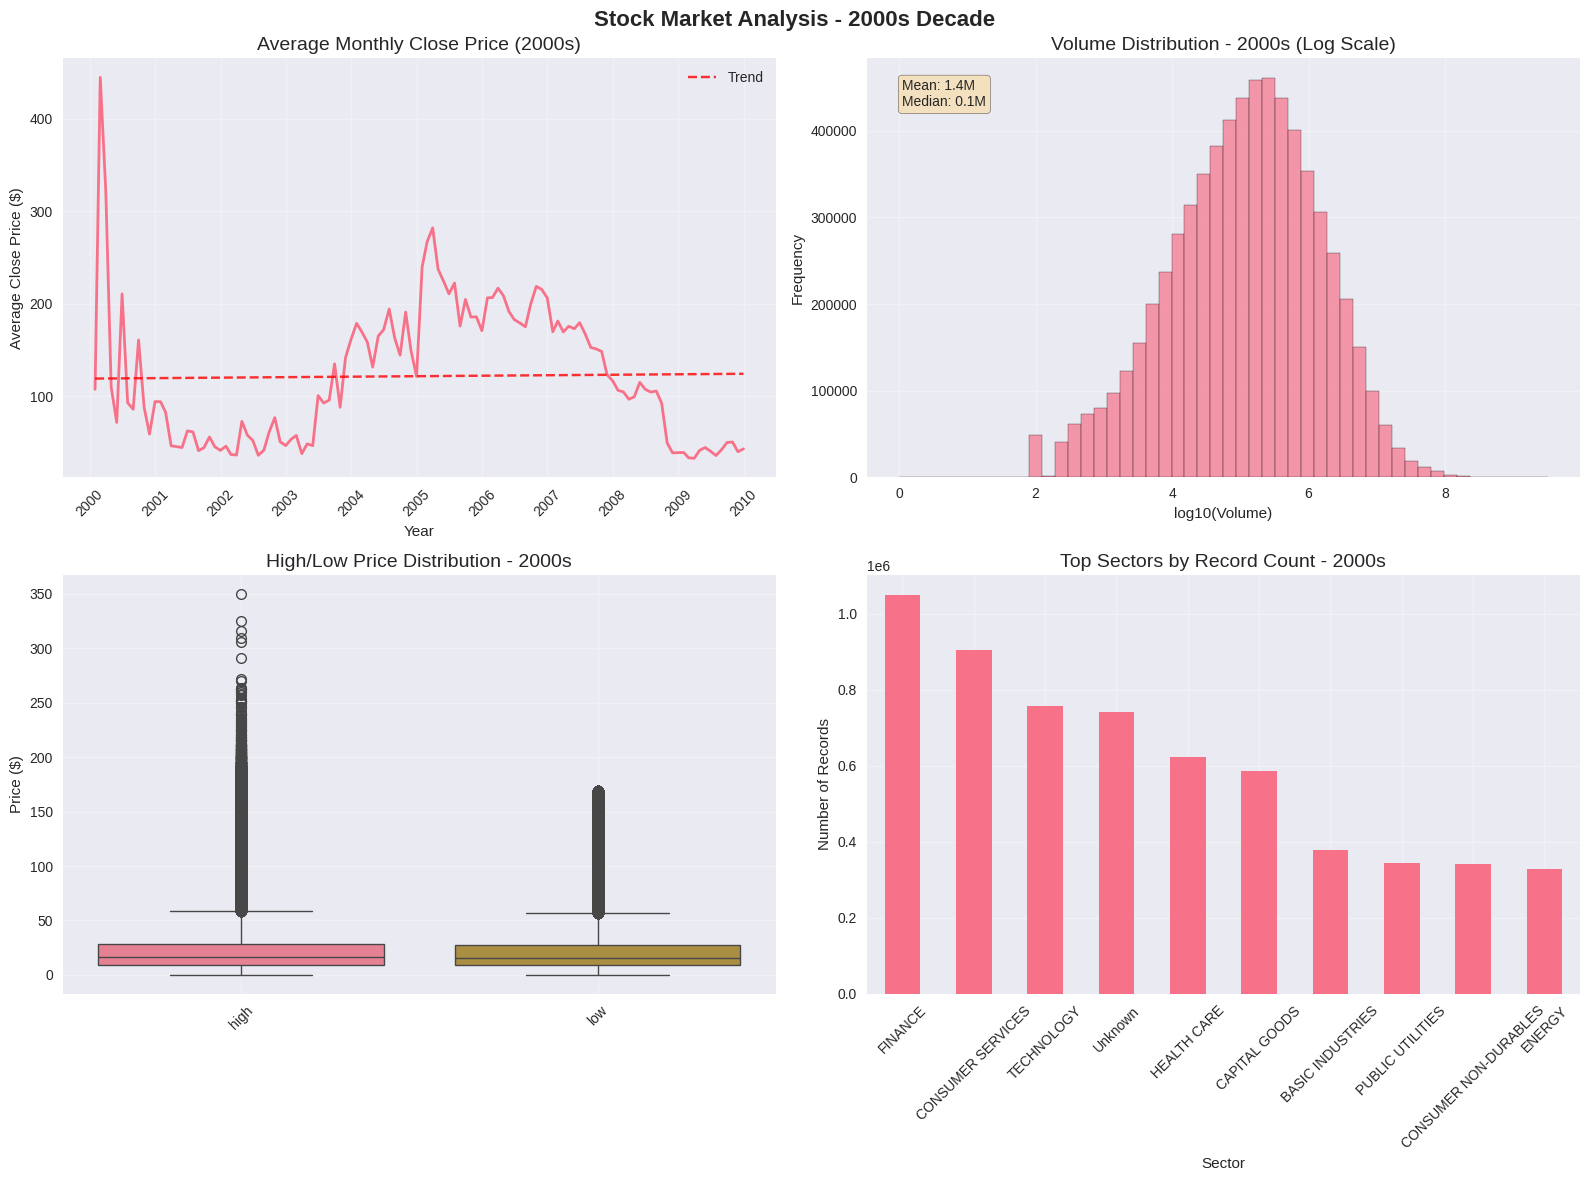

Saved visualization for 2000s as 'decade_analysis_2000s.png'

Creating visualizations for 2010s...


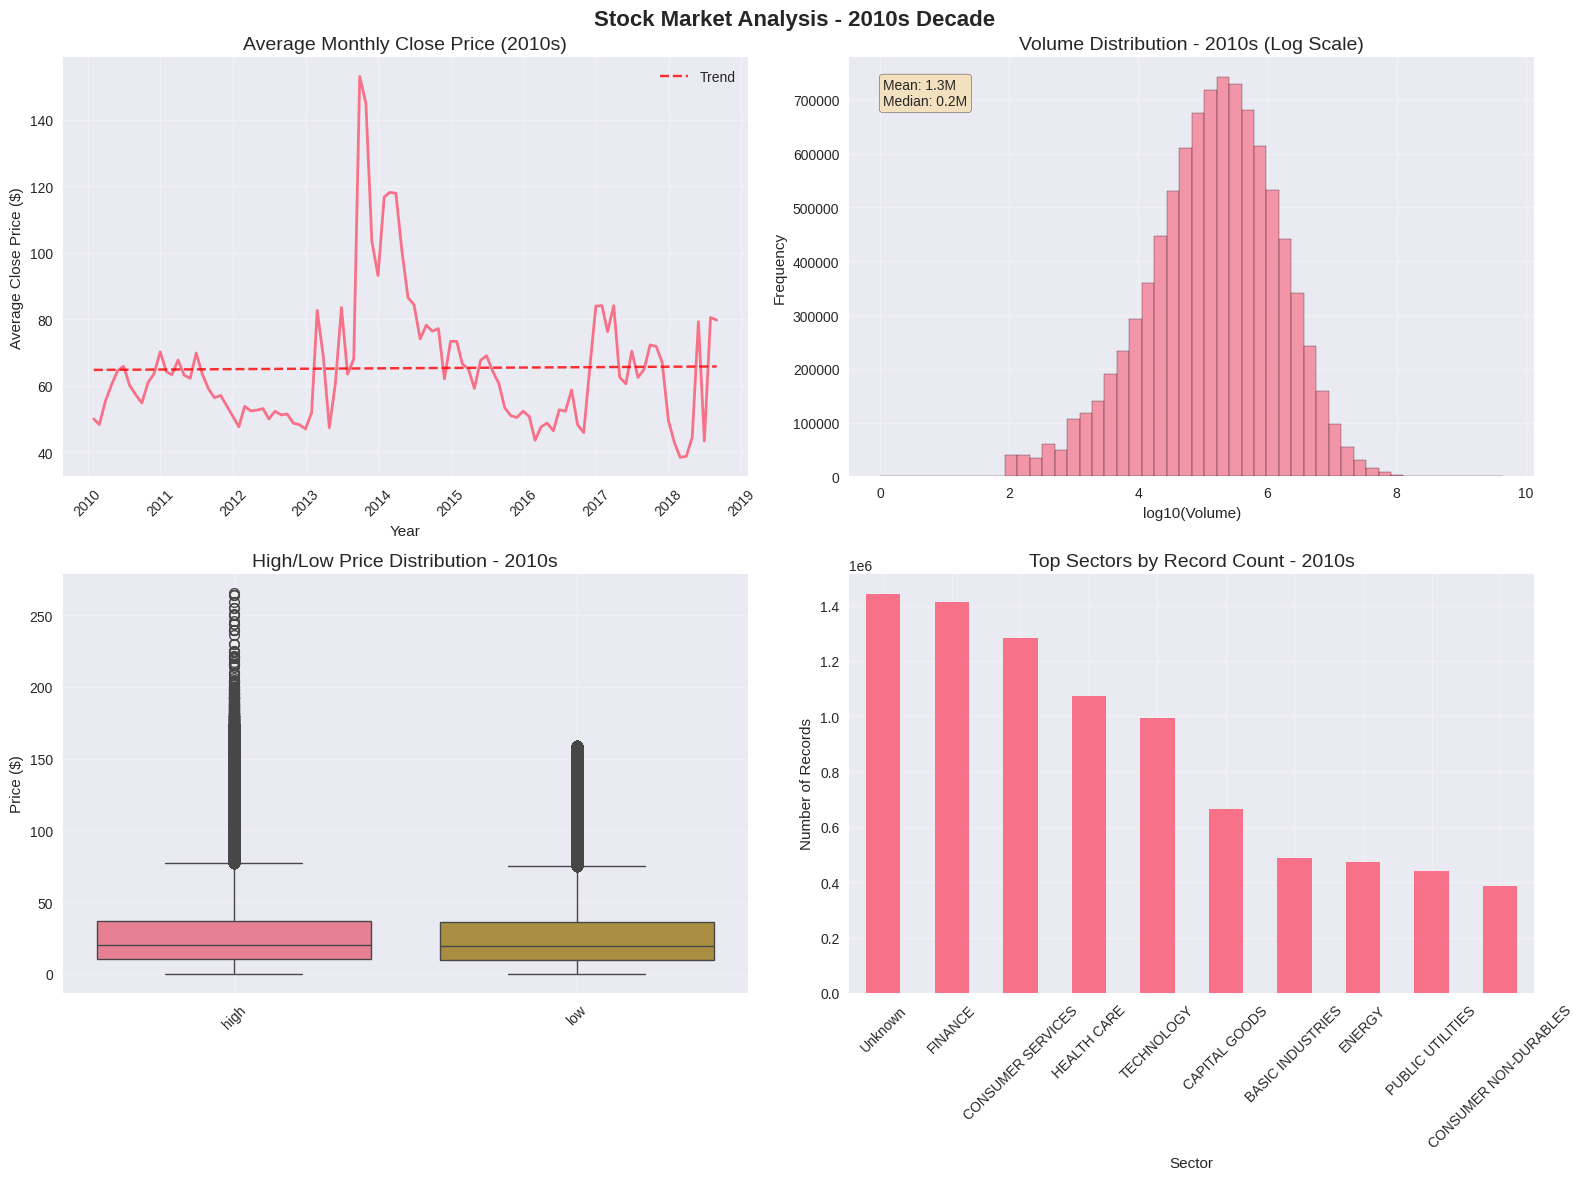

Saved visualization for 2010s as 'decade_analysis_2010s.png'


In [ ]:
# Step 4: Exploratory Data Analysis by Decade

print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS BY DECADE")
print("="*70)

# 1. Already merged in Step 2 - using the existing merged dataset

# 2. Calculate summary statistics for each decade
print("\n2. Calculating summary statistics for each decade...")

price_columns = ['open', 'high', 'low', 'close', 'volume']

# Create a dictionary to store decade statistics
decade_stats = {}

# Get decades from the existing decades dictionary
available_decades = sorted(decades.keys())

for decade in available_decades:
    print(f"\n{'='*40}")
    print(f"DECADE: {decade}s")
    print(f"{'='*40}")

    decade_data = decades[decade]

    print(f"Number of records: {len(decade_data):,}")

    # Calculate summary statistics
    stats = decade_data[price_columns].describe()
    decade_stats[decade] = stats

    print("\nSummary Statistics:")
    print(stats.round(2))

    # Additional statistics
    print(f"\nAdditional Stats for {decade}s:")
    for col in price_columns:
        if col != 'volume':  # Skip volume for these calculations
            print(f"{col.upper():6} - Mean: {decade_data[col].mean():.2f}, "
                  f"Median: {decade_data[col].median():.2f}, "
                  f"Std: {decade_data[col].std():.2f}")
        else:
            # For volume, we might want to see it in millions for readability
            print(f"VOLUME - Mean: {decade_data[col].mean()/1e6:.2f}M, "
                  f"Median: {decade_data[col].median()/1e6:.2f}M, "
                  f"Std: {decade_data[col].std()/1e6:.2f}M")

# 3. Create visualizations for each decade
print("\n3. Creating visualizations for each decade...")

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create comprehensive visualizations for each decade
for decade in available_decades:
    print(f"\nCreating visualizations for {decade}s...")
    decade_data = decades[decade]

    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Stock Market Analysis - {decade}s Decade', fontsize=16, fontweight='bold')

    # 3a. Time series plot for average monthly Close prices
    try:
        # Resample to monthly frequency and calculate mean close price
        monthly_close = decade_data['close'].resample('ME').mean()

        axes[0,0].plot(monthly_close.index, monthly_close.values, linewidth=2)
        axes[0,0].set_title(f'Average Monthly Close Price ({decade}s)', fontsize=14)
        axes[0,0].set_xlabel('Year')
        axes[0,0].set_ylabel('Average Close Price ($)')
        axes[0,0].grid(True, alpha=0.3)
        axes[0,0].tick_params(axis='x', rotation=45)

        # Add trend line
        if len(monthly_close) > 1:
            z = np.polyfit(range(len(monthly_close)), monthly_close.values, 1)
            p = np.poly1d(z)
            axes[0,0].plot(monthly_close.index, p(range(len(monthly_close))),
                          'r--', alpha=0.8, label='Trend')
            axes[0,0].legend()
    except Exception as e:
        print(f"Error in time series plot for {decade}s: {e}")
        axes[0,0].text(0.5, 0.5, 'Data not available', ha='center', va='center',
                      transform=axes[0,0].transAxes)

    # 3b. Histogram for Volume (log scale for better visualization)
    try:
        # Filter out zero volumes and use log scale
        volume_data = decade_data[decade_data['volume'] > 0]['volume']
        if len(volume_data) > 0:
            # Use log scale for volume distribution
            log_volume = np.log10(volume_data)
            axes[0,1].hist(log_volume, bins=50, alpha=0.7, edgecolor='black')
            axes[0,1].set_title(f'Volume Distribution - {decade}s (Log Scale)', fontsize=14)
            axes[0,1].set_xlabel('log10(Volume)')
            axes[0,1].set_ylabel('Frequency')
            axes[0,1].grid(True, alpha=0.3)

            # Add statistics to the plot
            mean_vol = volume_data.mean() / 1e6  # Convert to millions
            median_vol = volume_data.median() / 1e6
            axes[0,1].text(0.05, 0.95, f'Mean: {mean_vol:.1f}M\nMedian: {median_vol:.1f}M',
                          transform=axes[0,1].transAxes, verticalalignment='top',
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        else:
            axes[0,1].text(0.5, 0.5, 'No volume data', ha='center', va='center',
                          transform=axes[0,1].transAxes)
    except Exception as e:
        print(f"Error in volume histogram for {decade}s: {e}")
        axes[0,1].text(0.5, 0.5, 'Data not available', ha='center', va='center',
                      transform=axes[0,1].transAxes)

    # 3c. Box plots for High and Low prices
    try:
        price_data = decade_data[['high', 'low']].copy()

        # Remove extreme outliers for better visualization (top 1%)
        for col in ['high', 'low']:
            q99 = price_data[col].quantile(0.99)
            price_data = price_data[price_data[col] <= q99]

        sns.boxplot(data=price_data, ax=axes[1,0])
        axes[1,0].set_title(f'High/Low Price Distribution - {decade}s', fontsize=14)
        axes[1,0].set_ylabel('Price ($)')
        axes[1,0].tick_params(axis='x', rotation=45)
        axes[1,0].grid(True, alpha=0.3)
    except Exception as e:
        print(f"Error in box plot for {decade}s: {e}")
        axes[1,0].text(0.5, 0.5, 'Data not available', ha='center', va='center',
                      transform=axes[1,0].transAxes)

    # 3d. Sector analysis (if sector information is available)
    try:
        if 'sector' in decade_data.columns and not decade_data['sector'].isna().all():
            sector_counts = decade_data['sector'].value_counts().head(10)  # Top 10 sectors
            if len(sector_counts) > 0:
                sector_counts.plot(kind='bar', ax=axes[1,1])
                axes[1,1].set_title(f'Top Sectors by Record Count - {decade}s', fontsize=14)
                axes[1,1].set_xlabel('Sector')
                axes[1,1].set_ylabel('Number of Records')
                axes[1,1].tick_params(axis='x', rotation=45)
                axes[1,1].grid(True, alpha=0.3)
            else:
                axes[1,1].text(0.5, 0.5, 'No sector data', ha='center', va='center',
                              transform=axes[1,1].transAxes)
        else:
            # Alternative: Price distribution by year
            yearly_avg = decade_data['close'].groupby(decade_data.index.year).mean()
            yearly_avg.plot(kind='bar', ax=axes[1,1])
            axes[1,1].set_title(f'Average Close Price by Year - {decade}s', fontsize=14)
            axes[1,1].set_xlabel('Year')
            axes[1,1].set_ylabel('Average Close Price ($)')
            axes[1,1].tick_params(axis='x', rotation=45)
    except Exception as e:
        print(f"Error in sector analysis for {decade}s: {e}")
        axes[1,1].text(0.5, 0.5, 'Data not available', ha='center', va='center',
                      transform=axes[1,1].transAxes)

    plt.tight_layout()
    plt.savefig(f'decade_analysis_{decade}s.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Saved visualization for {decade}s as 'decade_analysis_{decade}s.png'")

# Step5: Comparative Analysis
1. Compare the summary statistics across decades and document any notable trends or changes in stock price behaviors and trading volumes.
2. Analyze the visualizations to identify patterns or anomalies that are consistent or have changed across decades.


COMPARATIVE ANALYSIS ACROSS DECADES


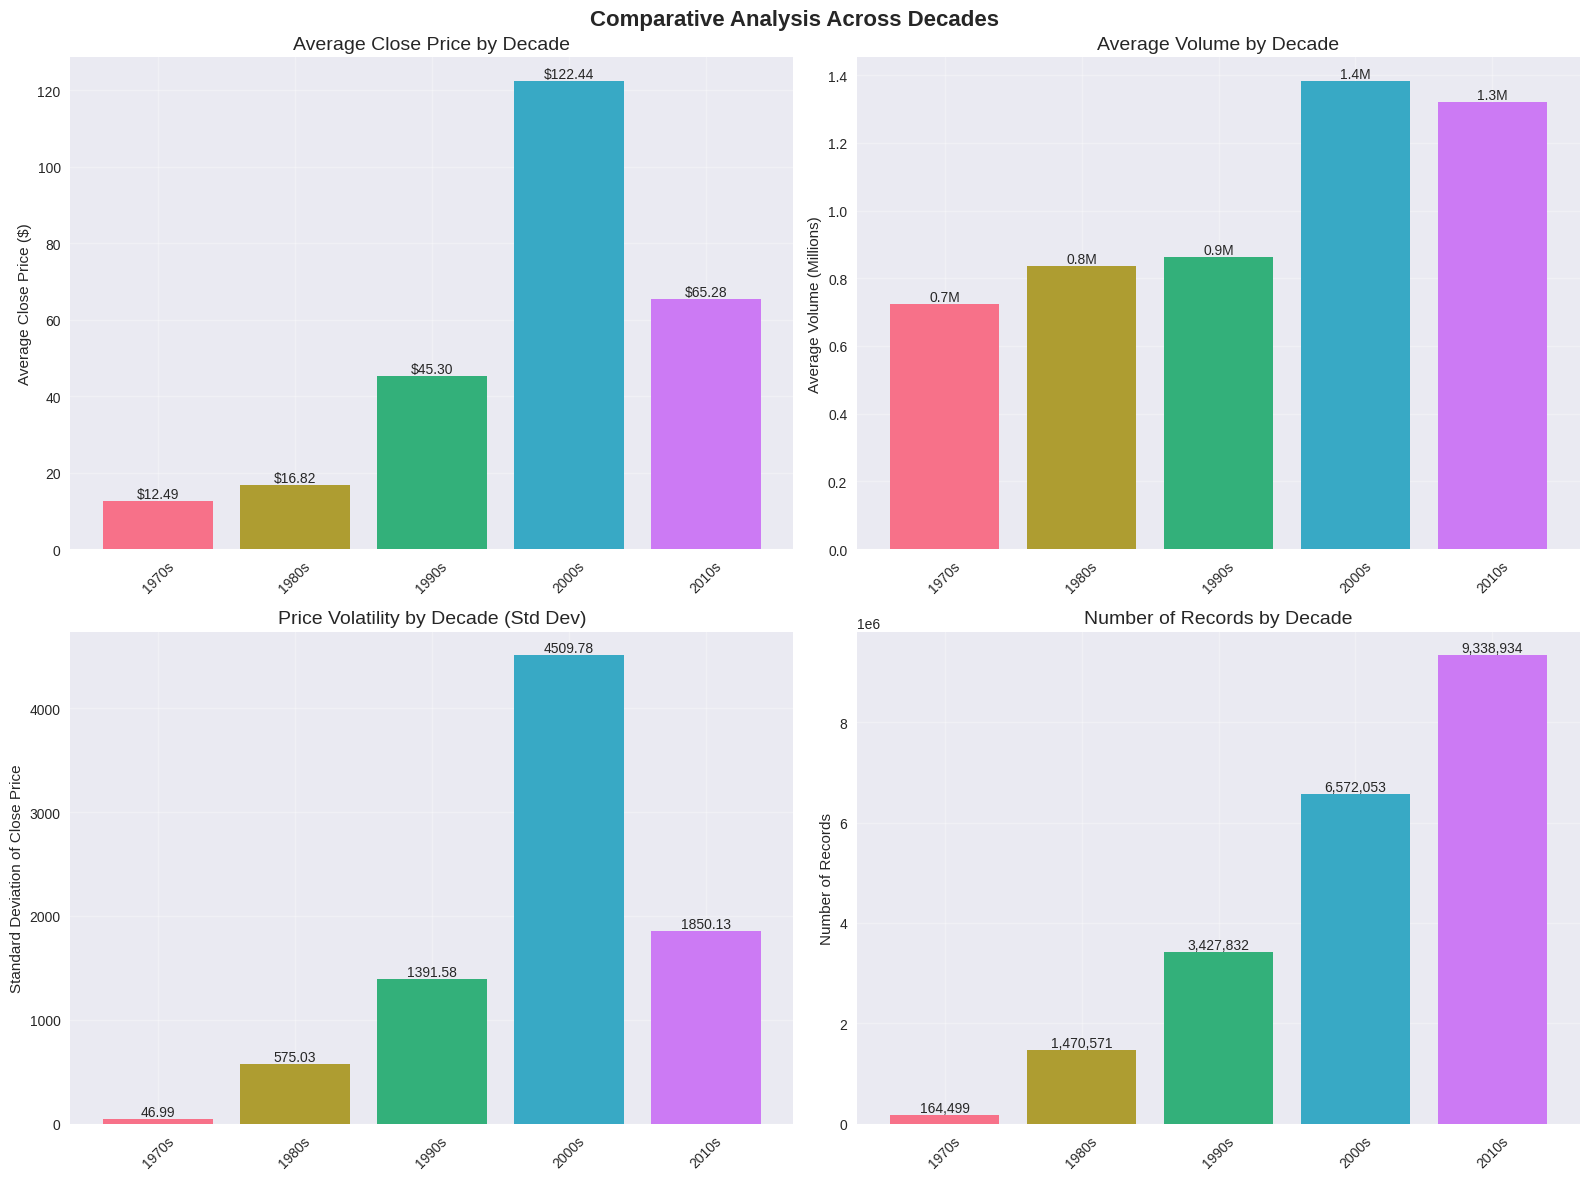

Saved comparative analysis as 'comparative_analysis_decades.png'

KEY INSIGHTS AND TRENDS

Notable Trends Across Decades:

1970s:
  - Average Close Price: $12.49
  - Average Volume: 0.7 million shares
  - Price Volatility: 46.99
  - Records: 164,499

1980s:
  - Average Close Price: $16.82
  - Average Volume: 0.8 million shares
  - Price Volatility: 575.03
  - Records: 1,470,571

1990s:
  - Average Close Price: $45.30
  - Average Volume: 0.9 million shares
  - Price Volatility: 1391.58
  - Records: 3,427,832

2000s:
  - Average Close Price: $122.44
  - Average Volume: 1.4 million shares
  - Price Volatility: 4509.78
  - Records: 6,572,053

2010s:
  - Average Close Price: $65.28
  - Average Volume: 1.3 million shares
  - Price Volatility: 1850.13
  - Records: 9,338,934

ADDITIONAL COMPARATIVE ANALYSIS

Growth in Market Activity:

From 1970s to 1980s:
  - Volume growth: +15.5%
  - Price growth: +34.7%
  - Records growth: +794.0%

From 1980s to 1990s:
  - Volume growth: +3.1%
  - Price gro

In [ ]:
# Step 5: Comparative Analysis

print("\n" + "="*70)
print("COMPARATIVE ANALYSIS ACROSS DECADES")
print("="*70)

# Create comparative visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparative Analysis Across Decades', fontsize=16, fontweight='bold')

# 1. Compare average close prices across decades
decade_means = []
decade_labels = []

for decade in available_decades:
    decade_data = decades[decade]
    mean_close = decade_data['close'].mean()
    decade_means.append(mean_close)
    decade_labels.append(f"{decade}s")

axes[0,0].bar(decade_labels, decade_means, color=sns.color_palette("husl", len(available_decades)))
axes[0,0].set_title('Average Close Price by Decade', fontsize=14)
axes[0,0].set_ylabel('Average Close Price ($)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(decade_means):
    axes[0,0].text(i, v, f'${v:.2f}', ha='center', va='bottom')

# 2. Compare average volumes across decades
volume_means = []
for decade in available_decades:
    decade_data = decades[decade]
    mean_volume = decade_data['volume'].mean() / 1e6  # Convert to millions
    volume_means.append(mean_volume)

axes[0,1].bar(decade_labels, volume_means, color=sns.color_palette("husl", len(available_decades)))
axes[0,1].set_title('Average Volume by Decade', fontsize=14)
axes[0,1].set_ylabel('Average Volume (Millions)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(volume_means):
    axes[0,1].text(i, v, f'{v:.1f}M', ha='center', va='bottom')

# 3. Compare price volatility (standard deviation) across decades
price_volatility = []
for decade in available_decades:
    decade_data = decades[decade]
    volatility = decade_data['close'].std()
    price_volatility.append(volatility)

axes[1,0].bar(decade_labels, price_volatility, color=sns.color_palette("husl", len(available_decades)))
axes[1,0].set_title('Price Volatility by Decade (Std Dev)', fontsize=14)
axes[1,0].set_ylabel('Standard Deviation of Close Price')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(price_volatility):
    axes[1,0].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# 4. Number of records by decade
record_counts = [len(decades[decade]) for decade in available_decades]

axes[1,1].bar(decade_labels, record_counts, color=sns.color_palette("husl", len(available_decades)))
axes[1,1].set_title('Number of Records by Decade', fontsize=14)
axes[1,1].set_ylabel('Number of Records')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(record_counts):
    axes[1,1].text(i, v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('comparative_analysis_decades.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved comparative analysis as 'comparative_analysis_decades.png'")

# Print key insights
print("\n" + "="*70)
print("KEY INSIGHTS AND TRENDS")
print("="*70)

print("\nNotable Trends Across Decades:")
for i in range(len(available_decades)):
    decade = available_decades[i]
    print(f"\n{decade}s:")
    print(f"  - Average Close Price: ${decade_means[i]:.2f}")
    print(f"  - Average Volume: {volume_means[i]:.1f} million shares")
    print(f"  - Price Volatility: {price_volatility[i]:.2f}")
    print(f"  - Records: {record_counts[i]:,}")

# Additional comparative analysis
print("\n" + "="*70)
print("ADDITIONAL COMPARATIVE ANALYSIS")
print("="*70)

print("\nGrowth in Market Activity:")
for i in range(1, len(available_decades)):
    prev_decade = available_decades[i-1]
    current_decade = available_decades[i]

    volume_growth = ((volume_means[i] - volume_means[i-1]) / volume_means[i-1]) * 100
    price_growth = ((decade_means[i] - decade_means[i-1]) / decade_means[i-1]) * 100

    print(f"\nFrom {prev_decade}s to {current_decade}s:")
    print(f"  - Volume growth: {volume_growth:+.1f}%")
    print(f"  - Price growth: {price_growth:+.1f}%")
    print(f"  - Records growth: {((record_counts[i] - record_counts[i-1]) / record_counts[i-1]) * 100:+.1f}%")

print("\n" + "="*70)
print("ANALYSIS COMPLETED")
print("="*70)